In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from TyEIA_key import eia_key
import requests
import scipy.stats as stats
from pprint import pprint

In [299]:
#http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=ELEC.PRICE.CA-ALL.A
ratesdata = "TylerData/StateElectricityProfiles.csv"

rates_df = pd.read_csv(ratesdata)
rates_df.set_index("Name", inplace = True)



In [300]:
rates_df


,Average Retail Price (cents/kWh),Net Summer Capacity (MW),Net Generation (MWh),Total Retail Sales (MWh),Year
Name,,,,,
Alabama,9.18,"32,547","152,878,688","86,182,548",2012
Alaska,16.30,"2,119","6,946,419","6,416,411",2012
Arizona,9.81,"27,587","110,904,994","75,063,343",2012
Arkansas,7.62,"16,355","65,005,678","46,859,567",2012
California,13.50,"71,329","199,518,567","259,538,038",2012
Colorado,9.39,"14,947","52,556,701","53,685,297",2012
Connecticut,15.50,"9,060","36,117,544","29,492,338",2012
Delaware,11.10,"3,357","8,633,694","11,519,331",2012
District of Columbia,11.90,10,"71,787","11,258,845",2012


In [301]:
states = ["IL", "OH", "CA", "AL", "NY", "AZ", "WA", "MA", "FL", "TX"]

rates_df = rates_df.loc[["Illinois","Ohio","California", "Alabama","New York", "Arizona", "Washington", "Massachusetts","Florida","Texas"]]            

rates_df["State"]=rates_df.index

C:\Users\Tyler Locke\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [303]:
rates_df['Index'] = range(1, len(rates_df) + 1)
rates_df.set_index("Index", inplace=True)
rates_df.head()
rates_df.to_csv("TylerData/StatesAnnualRates.csv")

C:\Users\Tyler Locke\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [304]:
states

['IL', 'OH', 'CA', 'AL', 'NY', 'AZ', 'WA', 'MA', 'FL', 'TX']

In [305]:
IL_df = rates_df[rates_df["State"]=="Illinois"]
OH_df = rates_df[rates_df["State"]=="Ohio"]
CA_df = rates_df[rates_df["State"]=="California"]
AL_df = rates_df[rates_df["State"]=="Alabama"]
NY_df = rates_df[rates_df["State"]=="New York"]
AZ_df = rates_df[rates_df["State"]=="Arizona"]
WA_df = rates_df[rates_df["State"]=="Washington"]
MA_df = rates_df[rates_df["State"]=="Massachusetts"]
FL_df = rates_df[rates_df["State"]=="Florida"]
TX_df = rates_df[rates_df["State"]=="Texas"]
CA_df.to_csv("TylerData/CaliforniaRates.csv")
CA_df

,Average Retail Price (cents/kWh),Net Summer Capacity (MW),Net Generation (MWh),Total Retail Sales (MWh),Year,State
Index,,,,,,
11,13.50,"71,329","199,518,567","259,538,038",2012,California
12,14.30,73772,200077115,261524911,2013,California
13,15.15,74646,198807622,262584786,2014,California
14,15.42,"74,892","196,703,858","261,170,437",2015,California
15,15.23,"76,537","196,963,215","256,846,635",2016,California


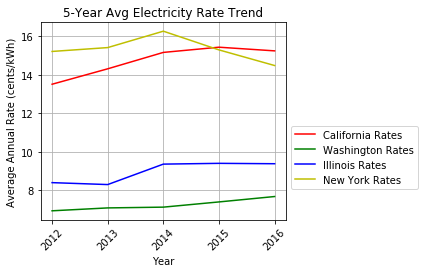

In [306]:
ax = CA_df.plot(x="Year", y = "Average Retail Price (cents/kWh)", label = "California Rates", color = "r", grid = True, title = "5-Year Avg Electricity Rate Trend")

WAplot = WA_df.plot(x="Year", y = "Average Retail Price (cents/kWh)", ax=ax, label = "Washington Rates", color="g")
ILplot = IL_df.plot(x="Year", y = "Average Retail Price (cents/kWh)", ax=ax, label = "Illinois Rates",color = "b")
NYplot = NY_df.plot(x="Year", y = "Average Retail Price (cents/kWh)", ax=ax, label = "New York Rates", grid = True, color = "y",rot=45)
ax.set_ylabel("Average Annual Rate (cents/kWh)")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.savefig("TylerData/AverageRates.png")


In [307]:
popdata = "TylerData/StatesAnnualRatesPop.csv"

pop_df = pd.read_csv(popdata)

pop_df.head()

,Index,Average Retail Price (cents/kWh),Net Summer Capacity (MW),Net Generation (MWh),Total Retail Sales (MWh),Year,Population,PopMillions,State
0,35,7.68,"30,997","114,086,582","88,885,316",2016,7280934,7.28,Washington
1,34,7.40,"31,003","109,287,458","90,116,086",2015,7073146,7.07,Washington
2,33,7.13,30949,116334363,92140777,2014,7152818,7.15,Washington
3,32,7.09,30656,114172916,92882723,2013,7046931,7.05,Washington
4,31,6.94,"30,910","116,835,474","92,336,441",2012,6963410,6.96,Washington


In [308]:
WAPop_df = pop_df[pop_df["State"]=="Washington"]
CAPop_df = pop_df[pop_df["State"]=="California"]
NYPop_df = pop_df[pop_df["State"]=="New York"]
ILPop_df = pop_df[pop_df["State"]=="Illinois"]
CAPop_df

,Index,Average Retail Price (cents/kWh),Net Summer Capacity (MW),Net Generation (MWh),Total Retail Sales (MWh),Year,Population,PopMillions,State
35,15,15.23,"76,537","196,963,215","256,846,635",2016,39296476,39.30,California
36,14,15.42,"74,892","196,703,858","261,170,437",2015,38654206,38.65,California
37,13,15.15,74646,198807622,262584786,2014,39032444,39.03,California
38,12,14.30,73772,200077115,261524911,2013,38701278,38.70,California
39,11,13.50,"71,329","199,518,567","259,538,038",2012,38347383,38.35,California


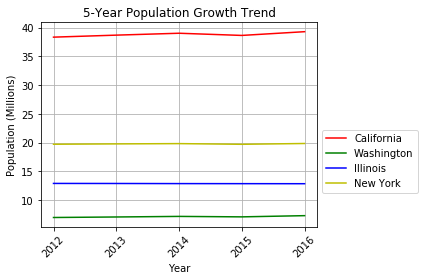

In [309]:
ax=CAPopplot = CAPop_df.plot(x="Year", y = "PopMillions", label = "California", title = "5-Year Population Growth Trend", color = "r")
WAPopplot = WAPop_df.plot(x="Year", y = "PopMillions", ax=ax, label = "Washington", color = "g")
ILPopplot = ILPop_df.plot(x="Year", y = "PopMillions", ax=ax, label = "Illinois", color ="b")
NYPopplot = NYPop_df.plot(x="Year", y = "PopMillions", ax=ax, label = "New York", grid = True, rot = 45, color ="y")
ax.locator_params(integer=True)
ax.set_ylabel("Population (Millions)")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.savefig("TylerData/Populations.png")
# plt.plot()